# Hydrogen Atom 

## Python library used in this notebook

In [1]:
from scipy.constants import physical_constants
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np

from scipy import *
from scipy import integrate
from scipy import optimize
from numpy import *
from pylab import *

C:\HRISHIT\jupyter notebook\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
print('Matplotlib', matplotlib.__version__)
print('SciPy', scipy.__version__)
print('Seaborn', sns.__version__)
print('NumPy', np.__version__)

Matplotlib 3.7.0
SciPy 1.10.0
Seaborn 0.12.2
NumPy 1.23.5


In [3]:
%matplotlib notebook
plt.style.use('classic')

One-electron atom (Hydrogen, singly ionized helium...). Force is defined as $ F = -\frac{Ze^2}{r^2} $.
### Potential of the system:

Thus the Potential energy of the system is;
$$ V(r) = -\int_{0}^{r}F.dr = \left(-\frac{Ze^2}{r}\right) $$
and the potential energy is spherically symetric(independent of $\theta$ and $\phi$.

Now we will solve the differential equation corresponding to the Hydrogen atom i.e.


$$\frac{\partial^2 \psi}{\partial r^2} + \frac{2}{r} \frac{\partial \psi}{\partial r} + \frac{1}{r^2} \frac{\partial^2 \psi}{\partial \theta^2}+\frac{\cos\theta}{r^2 \sin\theta}\frac{\partial \psi}{\partial \theta} + \frac{1}{r^2 \sin^2\theta} \frac{\partial^2 \psi}{\partial \phi^2} + \frac{2\mu}{\hbar^2} \left(E-V\right)\psi = 0$$

There are three parts in this 2nd order partial differential equation:
* Radial part - $R_{n \ell}(r)$
* Azimuthul part - $Y_{\ell}^{m}(\theta, \varphi)$
$$\psi_{n \ell m}(r, \theta, \varphi) = R_{n \ell}(r) Y_{\ell}^{m}(\theta, \varphi)$$

### Solution of the Radial Part $\left(R(r)\right)$ of the Wavefunction :

The radial function describes the behavior of the electron as a function of distance $r$ from the nucleus, providing a means to visualize the density of electron clouds at different distances from the nucleus.\
$$R_{n \ell}(r) = \sqrt{\left( \frac{2}{n a_0} \right)^3 \frac{(n-\ell-1)!}{2n(n+\ell)!}} e^{-\frac{r}{n a_0}} \left( \frac{2r}{n a_0} \right)^{\ell} L_{n-\ell-1}^{2\ell+1}\left(\frac{2r}{n a_0}\right)$$

In [4]:
from scipy import linalg

plt.rc('figure', figsize = (6, 4.5))     # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)      # Adjusts supblot parameters for new size

In [5]:
def u(x):       # Effective potential energy function
    return l*(l+1)/x**2 - 2/x

In [6]:
n = 2000    # Number of intervals (J=1 in my notes)
dim = n - 1 # Number of internal points
xl = 0      # xl corresponds to origin
xr = 200.   # 
delta = (xr-xl)/n
        
x = np.linspace(xl+delta,xr-delta,dim)

l = 1       # orbital quantum number

#Fill Hamiltonian
h = np.zeros((dim,dim),float)
for i in range(len(h)-1):
        h[i,i+1] = h[i+1,i] = -1/delta**2 

for i in range(len(h)):
        h[i,i] = 2./delta**2 + u(x[i]) 

vals, vecs = linalg.eigh(h)      #Note: eigenvectors in columns of vecs

<IPython.core.display.Javascript object>


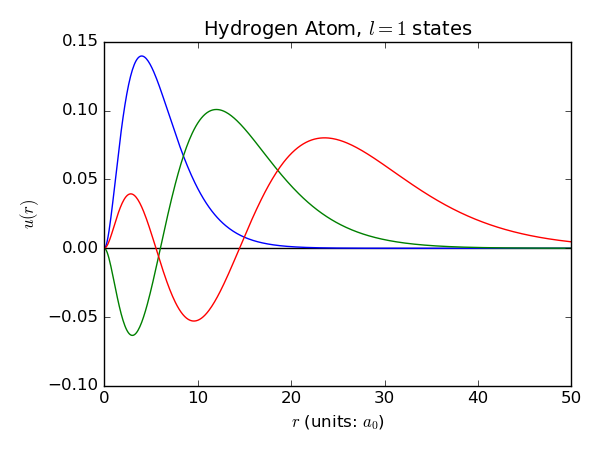

m =  0 , energy = -0.25005216296857374 , 1/energy = -3.999165566608911
m =  1 , energy = -0.11113514902286992 , 1/energy = -8.998053350288084
m =  2 , energy = -0.06251238530016257 , 1/energy = -15.996829991342523


In [7]:
plt.figure(facecolor='white')
plt.title("Hydrogen Atom, $l = 1$ states")
plt.xlabel("$r$ (units: $a_0$)")
plt.ylabel("$u(r)$")
plt.axhline(0, color='black')     #draw x axis
plt.grid(False)
plt.xlim(0,50)

for m in range(3):
    y = np.transpose(vecs)[m]
    plt.plot(x,y)
    print('m = ',m, ', energy =', vals[m], ', 1/energy =', 1/vals[m])

#### Radial probability density

<IPython.core.display.Javascript object>


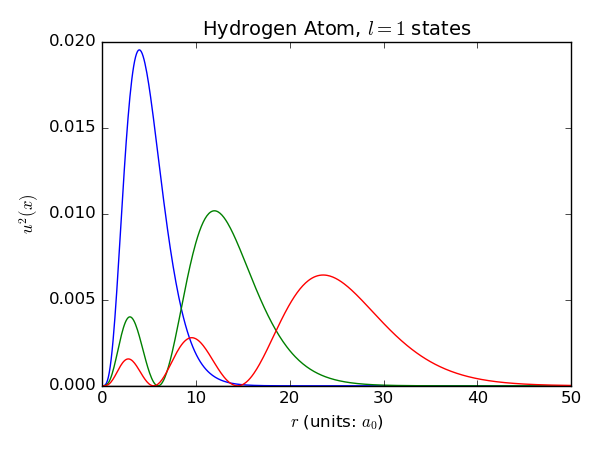

In [8]:
plt.figure(facecolor='white')
plt.title("Hydrogen Atom, $l = 1$ states")
plt.xlabel("$r$ (units: $a_0$)")
plt.ylabel("$u^2(x)$")
plt.axhline(0, color='black')     #draw x axis
plt.grid(False)
plt.xlim(0,50)

for m in range(3):
    #y = np.append([xl],np.append(np.transpose(vecs)[m],[xr]))
    y = np.transpose(vecs)[m]
    plt.plot(x, y**2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import exp, sqrt, pi, cos, sin
from scipy.integrate import dblquad, tplquad, quad
import cmath

class HydrogenicAtom:
    """
    This class models the wavefunctions and energy levels of a hydrogenic atom.
    
    It assumes an infinitely heavy nucleus, so the mass is that of the
    electron.
    
    Masses are in kg, distances are in m
    
    This whole class uses complex numbers and math functions.
    """
    
    def __init__(self, n=1, l=0, ml=0, z=1):
        """
        This sets some instance attributes and a few constant used throughout the
        class.
        
        Leave z at 1 for hydrogen.
        
        Parameters
        ----------    
        n: int
            Principal quantum number.
            
        l: int
            Orbital angular momentum quantum number.
            
        ml: int
            Magnetic quantum number.
            
        z: int
            Number of protons in the nucleus. Defaults to 1.
        """
        self.a0 = 5.29e-11       # m
        self.me = 9.10938356e-31 # kg
        self.e0 = 8.85418782e-12 # Permitivity of free space
        self.e_charge = 1.60217662e-19 # Coulombs, charge of electron
        self.hbar = 1.054571817e-34  # Reduced Planck's constant
        self.n = n
        self.l = l
        self.ml = ml
        self.z = z
        
    def rho(self, r):
        """
        Calculates the rho part of the radial function. It assumes an infinitely
        heavy nucleus.
        
        From Atkins and de Paula, Table 10.1, page 324
        
        Parameters
        ----------
        r: float
            The distance, in meters being calculated
            
        Returns
        -------
        float
            The value of rho.
        """
        return (2 * self.z / self.n / self.a0) * r
    
    def radial(self, r):
        """
        The radial part of the wavefunction
        
        Parameters
        ----------
        r: float
            Radius, in meters
            
        Returns
        -------
        complex
            The value of the radial wavefunction, which only uses the real
            part of the complex value.
            
        Raises
        ------
        Exception
            Raises an exception for invalid n and l
        """
        za32 = (self.z / self.a0) ** (3/2)
        rho = self.rho(r)
        exp_rho = exp(-rho / 2.0)
        
        if self.n == 1 and self.l == 0:  # 1s orbital
            return 2 * za32 * exp_rho
        elif self.n == 2 and self.l == 0:  # 2s orbital
            return (1.0 / sqrt(8)) * za32 * (2.0 - rho) * exp_rho
        elif self.n == 2 and self.l == 1:  # 2p orbital
            return (1.0 / sqrt(24)) * za32 * rho * exp_rho
        elif self.n == 3 and self.l == 0:
            return (1.0 / sqrt(243)) * za32 * (6.0 - 6 * rho + rho ** 2) * exp_rho
        elif self.n == 3 and self.l == 1:
            return (1.0 / sqrt(486)) * za32 * (4.0 - rho) * rho * exp_rho
        elif self.n == 3 and self.l == 2:
            return (1.0 / sqrt(2430)) * za32 * rho ** 2 * exp_rho
        else:
            raise Exception(f'No radial function for {self.n} and {self.l}')
            
    def spherical_harmonic(self, theta, phi):
        """
        Find the value of the spherical harmonic given an quantum numbers
        l, ml and coordinates theta, phi.
        
        From Atkins and de Paula, Table 9.3, page 302
        
        Parameters
        ----------    
        theta: float
            Theta coordinate, from 0 to pi

        phi: float
            Phi coordinate, from 0 to 2*pi
            
        Returns
        -------
        complex
            The value of the spherical harmonic, which is a complex value
            
        Raises
        ------
        Exception
            Raises an Exception for an invalid combination of l and ml
        """
        if self.l == 0 and self.ml == 0:
            return sqrt(1 / 4.0 / pi)
        
        elif self.l == 1 and self.ml == 0:
            return sqrt(3.0 / 4.0 / pi) * cos(theta)
        elif self.l == 1 and self.ml == 1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 1 and self.ml == -1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * cmath.exp(-1j * phi)
        
        elif self.l == 2 and self.ml == 0:
            return sqrt(5.0 / 16.0 / pi) * (3 * cos(theta)** 2 - 1)
        elif self.l == 2 and self.ml == 1:
            return -sqrt(15.0 / 8.0 / pi) * cos(theta) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 2 and self.ml == -1:
            return sqrt(15.0 / 8.0 / pi) * cos(theta) * sin(theta) * cmath.exp(-1j * phi)
        elif self.l == 2 and self.ml == 2:
            return sqrt(15.0 / 32.0 / pi) * sin(theta) ** 2 * cmath.exp(2j * phi)
        elif self.l == 2 and self.ml == -2:
            return sqrt(15.0 / 32.0 / pi) * sin(theta) ** 2 * cmath.exp(-2j * phi)
        
        elif self.l == 3 and self.ml == 0:
            return sqrt(7.0 / 16.0 / pi) * (5 * cos(theta) ** 3 - 3 * cos(theta))
        elif self.l == 3 and self.ml == 1:
            return -sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 3 and self.ml == -1:
            return sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * cmath.exp(-1j * phi)
        elif self.l == 3 and self.ml == 2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * cmath.exp(2j * phi)
        elif self.l == 3 and self.ml == -2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * cmath.exp(-2j * phi)
        elif self.l == 3 and self.ml == 3:
            return -sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * cmath.exp(3j * phi)
        elif self.l == 3 and self.ml == -3:
            return sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * cmath.exp(-3j * phi)
        
        else:
            raise Exception(f'No equation for l={self.l} and ml={self.ml}')
            
    def wavefunction(self, r, theta, phi):
        """
        Returns the value of the wavefunction at the given location.
        
        Parameters
        ----------
        r: float
            The r value, from 0 to infinity
            
        theta: float
            The theta value, from 0 to pi
            
        phi: float
            The phi value, from 0 to 2*pi
            
        Returns
        -------
        complex
            The complex value of the wavefunction.
        """
        return self.radial(r) * self.spherical_harmonic(theta, phi)
            
    def energy(self):
        """
        This calcuates the energy in Joules of the electron at the n level of this
        atoms configuration.
        
        It makes the infinite mas approximation for the nucleus, so the mass in
        the expression is that of the electron.
        
        From page 324 of Atkins and de Paula
        
        Returns
        -------
        float, float
            First float is energy level in joules, second float is energy level in eV
        """
        ev_per_joule = 6.242e+18
        numerator = self.z**2 * self.me * self.e_charge**4
        denominator = 32 * pi**2 * self.e0**2 * self.hbar**2 * self.n**2
        value = numerator / denominator
        joules = -value
        ev = joules * ev_per_joule
        return joules, ev
    
    def mean_orbital_radius(self):
        """
        Returns the mean orbital radius of the given state of this atom.
        It does this by integration.
        
        Returns
        -------
        float
            The mean orbital radius
        """
        second_point_guess = 10 * self.n * self.a0
        def integrand(r):
            return r**3 * self.radial(r)**2
        radius, _ = quad(integrand, 0, 1, points=[0, second_point_guess])
        return radius

In [10]:
parameters = [
    { 'n': 3, 'l': 0, 'ml': 0 },
    { 'n': 3, 'l': 1, 'ml': 0 },
    { 'n': 3, 'l': 1, 'ml': 1 },
    { 'n': 3, 'l': 1, 'ml': -1 },
    { 'n': 3, 'l': 2, 'ml': 0 },
    { 'n': 3, 'l': 2, 'ml': 1 },
    { 'n': 3, 'l': 2, 'ml': -1 },
    { 'n': 3, 'l': 2, 'ml': 2 },
    { 'n': 3, 'l': 2, 'ml': -2 },
    { 'n': 3, 'l': 3, 'ml': 0 },
    { 'n': 3, 'l': 3, 'ml': 1 },
    { 'n': 3, 'l': 3, 'ml': -1 },
    { 'n': 3, 'l': 3, 'ml': 2 },
    { 'n': 3, 'l': 3, 'ml': -2 },
    { 'n': 3, 'l': 3, 'ml': 3 },
    { 'n': 3, 'l': 3, 'ml': -3 }
]

for p in parameters:
    ha = HydrogenicAtom(n=p['n'], l=p['l'], ml=p['ml'])
    def integrand(phi,theta):
        value = ha.spherical_harmonic(theta, phi)
        return abs(value) ** 2 * sin(theta).real
    p['result'], _ = dblquad(integrand, 0, pi, 0, 2 * pi)
    
for p in parameters:
    print(p)

{'n': 3, 'l': 0, 'ml': 0, 'result': 0.9999999999999999}
{'n': 3, 'l': 1, 'ml': 0, 'result': 1.0}
{'n': 3, 'l': 1, 'ml': 1, 'result': 0.9999999999999999}
{'n': 3, 'l': 1, 'ml': -1, 'result': 0.9999999999999999}
{'n': 3, 'l': 2, 'ml': 0, 'result': 1.0000000000000002}
{'n': 3, 'l': 2, 'ml': 1, 'result': 0.9999999999999999}
{'n': 3, 'l': 2, 'ml': -1, 'result': 0.9999999999999999}
{'n': 3, 'l': 2, 'ml': 2, 'result': 1.0}
{'n': 3, 'l': 2, 'ml': -2, 'result': 1.0}
{'n': 3, 'l': 3, 'ml': 0, 'result': 1.0}
{'n': 3, 'l': 3, 'ml': 1, 'result': 1.0000000000000004}
{'n': 3, 'l': 3, 'ml': -1, 'result': 1.0000000000000004}
{'n': 3, 'l': 3, 'ml': 2, 'result': 0.9999999999999999}
{'n': 3, 'l': 3, 'ml': -2, 'result': 0.9999999999999999}
{'n': 3, 'l': 3, 'ml': 3, 'result': 1.0000000000000002}
{'n': 3, 'l': 3, 'ml': -3, 'result': 1.0000000000000002}


<IPython.core.display.Javascript object>


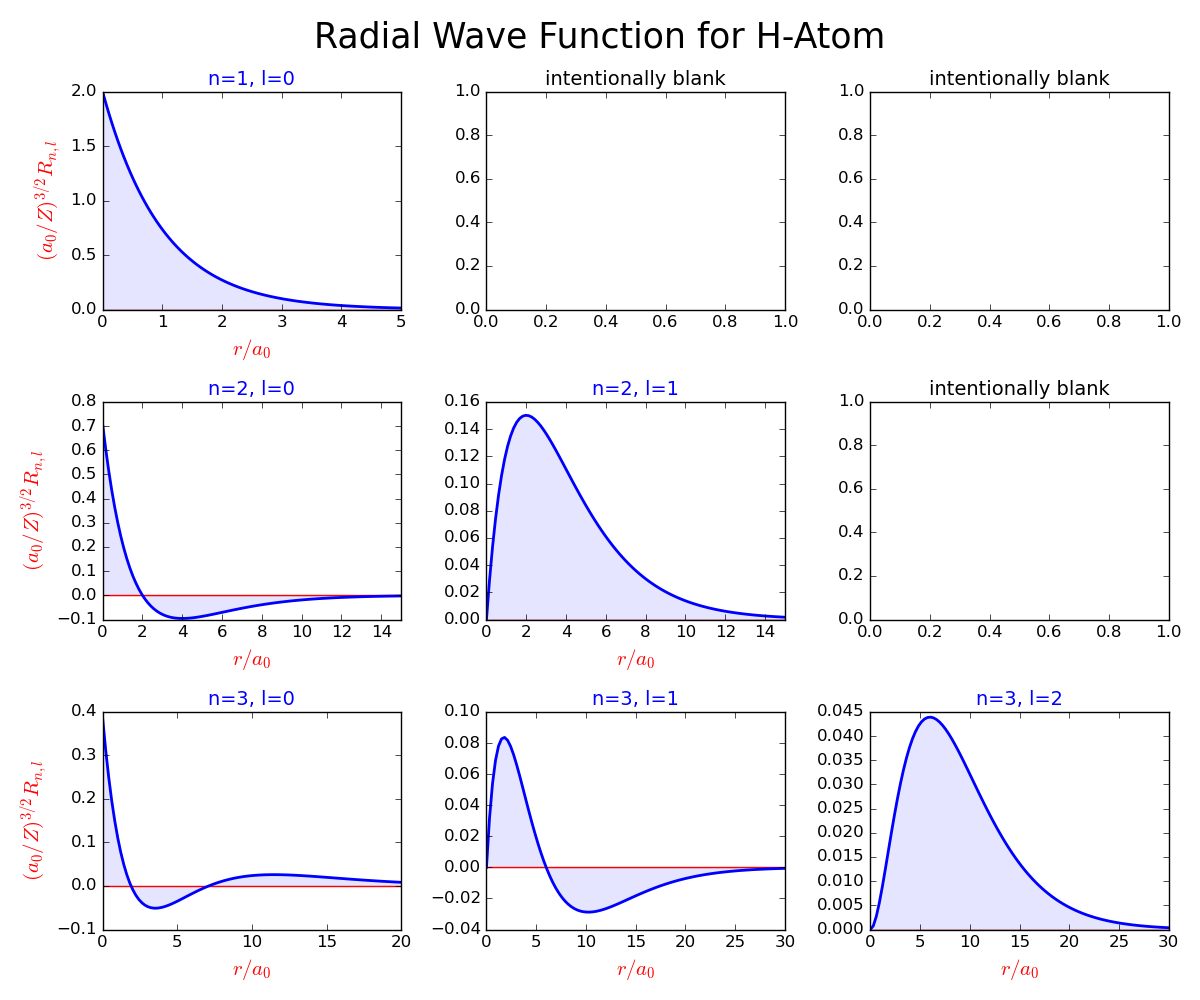

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), facecolor='white')

# Just so I can access instance variables in an instance to make the dictionary.
ha = HydrogenicAtom()
yscaler = (ha.z / ha.a0)**(3/2)


parameters = [
    {'n': 1, 'l': 0, 'x_scaler': 5, 'yscaler':  yscaler },
    {'n': 2, 'l': 0, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 0, 'x_scaler': 20, 'yscaler': yscaler },
    {'n': 2, 'l': 1, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 1, 'x_scaler': 30, 'yscaler': yscaler },
    {'n': 3, 'l': 2, 'x_scaler': 30, 'yscaler': yscaler }
]

for p in parameters:
    row = p['n'] - 1
    col = p['l']
    ha = HydrogenicAtom(n=p['n'], l=p['l'])
    xs = np.linspace(0, ha.a0 * p['x_scaler'], 100)
    xs_labels = xs / ha.a0  # so that the x axis is labeled in units of a0
    ys = [ha.radial(r) / p['yscaler'] for r in xs]
    ax = axs[row, col]
    ax.set_title(f'n={p["n"]}, l={p["l"]}', color='b')
    ax.set_xlim(min(xs_labels), max(xs_labels))
    if col == 0:
        ax.set_ylabel('$(a_0/Z)^{3/2}R_{n,l}$', color='r', fontsize=15)
    ax.set_xlabel('$r/a_0$', color='r', fontsize=15)
    ax.axhline(0.0, color='r')
    ax.plot(xs_labels, ys, color='b', linewidth=2)
    ax.fill_between(xs_labels, ys, 0, alpha=0.1)

    
axs[0, 1].set_title('intentionally blank')
axs[0, 2].set_title('intentionally blank')
axs[1, 2].set_title('intentionally blank')
axs[0, 1].set_facecolor('white')
axs[0, 2].set_facecolor('white')
axs[1, 2].set_facecolor('white')
   
fig.suptitle('Radial Wave Function for H-Atom', fontsize=25)    
plt.tight_layout()

<IPython.core.display.Javascript object>


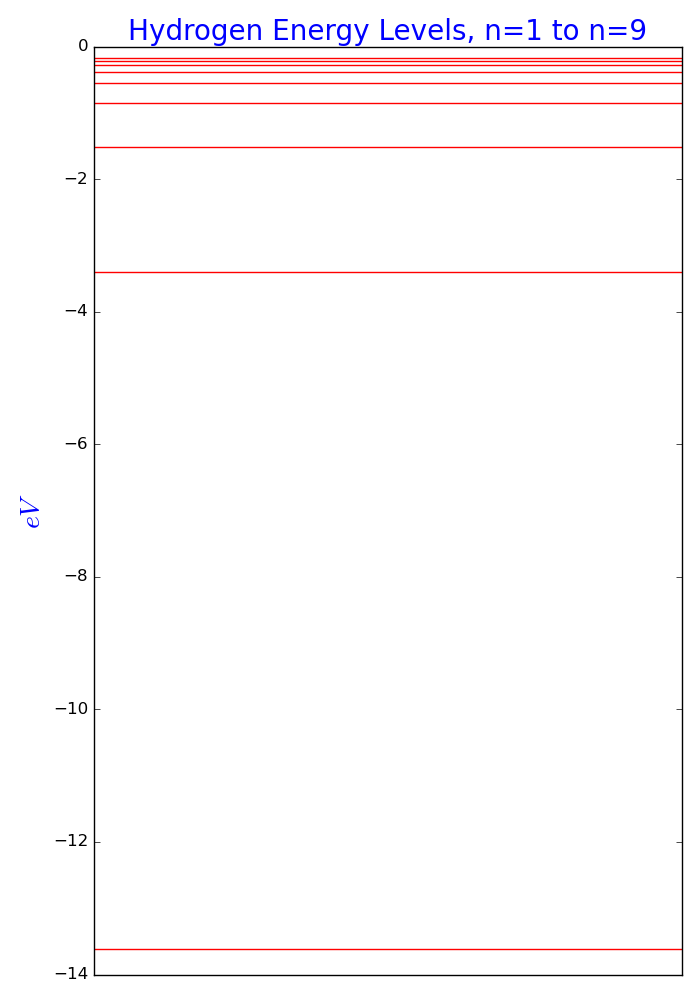

In [12]:
ys = []
for n in range(1, 10):
    ha = HydrogenicAtom(n=n)
    _, ev = ha.energy()
    ys.append((n, round(ev, 2)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 10), facecolor='White')
ax.set_ylim(-14.0, 0.0)
ax.set_xticks([])
ax.set_ylabel('$eV$', size=20, color='b')
ax.set_title('Hydrogen Energy Levels, n=1 to n=9', size=20, color='b')
for y in ys:
    ax.axhline(y[1], color='r')